In [2]:
#import libraries
import os
import random as rd
import tensorflow as tf
import matplotlib.pyplot as plt
import pyBigWig as pbg
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import scipy.stats
import pandas as pd


In [15]:
#load all chrs
X_2L=np.load('/home/florian/projet/r6.16/seq.npz')['2L']
X_2R=np.load('/home/florian/projet/r6.16/seq.npz')['2R']
X_3L=np.load('/home/florian/projet/r6.16/seq.npz')['3L']
X_3R=np.load('/home/florian/projet/r6.16/seq.npz')['3R']
X_4=np.load('/home/florian/projet/r6.16/seq.npz')['4']
X_X=np.load('/home/florian/projet/r6.16/seq.npz')['X']
X_Y=np.load('/home/florian/projet/r6.16/seq.npz')['Y']

In [93]:
#load all chrs
X_2L=np.load('/home/florian/projet/r6.16/seq_reverse_complement.npz')['2L']
X_2R=np.load('/home/florian/projet/r6.16/seq_reverse_complement.npz')['2R']
X_3L=np.load('/home/florian/projet/r6.16/seq_reverse_complement.npz')['3L']
X_3R=np.load('/home/florian/projet/r6.16/seq_reverse_complement.npz')['3R']
X_4=np.load('/home/florian/projet/r6.16/seq_reverse_complement.npz')['4']
X_X=np.load('/home/florian/projet/r6.16/seq_reverse_complement.npz')['X']
X_Y=np.load('/home/florian/projet/r6.16/seq_reverse_complement.npz')['Y']

In [16]:
# create scATAC values for each chr
cut=100
Y_2L=np.load('/home/florian/projet/scATACseq_14chr.npz')['2L'][0]
Y_2L[Y_2L >= cut] = cut
Y_2L=Y_2L/cut

Y_2R=np.load('/home/florian/projet/scATACseq_14chr.npz')['2R'][0]
Y_2R[Y_2R >= cut] = cut
Y_2R=Y_2R/cut

Y_3L=np.load('/home/florian/projet/scATACseq_14chr.npz')['3L'][0]
Y_3L[Y_3L >= cut] = cut
Y_3L=Y_3L/cut

Y_3R=np.load('/home/florian/projet/scATACseq_14chr.npz')['3R'][0]
Y_3R[Y_3R >= cut] = cut
Y_3R=Y_3R/cut

Y_4=np.load('/home/florian/projet/scATACseq_14chr.npz')['4'][0]
Y_4[Y_4 >= cut] = cut
Y_4=Y_4/cut

Y_X=np.load('/home/florian/projet/scATACseq_14chr.npz')['X'][0]
Y_X[Y_X >= cut] = cut
Y_X=Y_X/cut

Y_Y=np.load('/home/florian/projet/scATACseq_14chr.npz')['Y'][0]
Y_Y[Y_Y >= 30] = 30
Y_Y=Y_Y/30

In [84]:
df = pd.read_csv ('/home/florian/projet/models/test_window_8001/history.csv')
pred2L=np.load('/home/florian/projet/models/preds_test_window_8001.npz')['pred2L']
pred2R=np.load('/home/florian/projet/models/preds_test_window_8001.npz')['pred2R']
pred3L=np.load('/home/florian/projet/models/preds_test_window_8001.npz')['pred3L']
pred3R=np.load('/home/florian/projet/models/preds_test_window_8001.npz')['pred3R']
pred4=np.load('/home/florian/projet/models/preds_test_window_8001.npz')['pred4']
predX=np.load('/home/florian/projet/models/preds_test_window_8001.npz')['predX']
predY=np.load('/home/florian/projet/models/preds_test_window_8001.npz')['predY']
corr2L=np.corrcoef(Y_2L[::10],pred2L)[0][1]
corr2R=np.corrcoef(Y_2R[::10],pred2R)[0][1]
corr3R=np.corrcoef(Y_3R[1::10],pred3R)[0][1]#1
corr3L=np.corrcoef(Y_3L[::10],pred3L)[0][1]
corr4=np.corrcoef(Y_4[1::10],pred4)[0][1]#1
corrX=np.corrcoef(Y_X[1::10],predX)[0][1]#1
corrY=np.corrcoef(Y_Y[::10],predY)[0][1]
# corr2L=np.corrcoef(Y_2L[::5],pred2L)[0][1]
# corr2R=np.corrcoef(Y_2R[1::5],pred2R)[0][1]
# corr3R=np.corrcoef(Y_3R[1::5],pred3R)[0][1]#1
# corr3L=np.corrcoef(Y_3L[::5],pred3L)[0][1]
# corr4=np.corrcoef(Y_4[1::5],pred4)[0][1]#1
# corrX=np.corrcoef(Y_X[1::5],predX)[0][1]#1
# corrY=np.corrcoef(Y_Y[::5],predY)[0][1]
# corr2L=np.corrcoef(Y_2L,pred2L.ravel())[0][1]
# corr2R=np.corrcoef(Y_2R,pred2R.ravel())[0][1]
# corr3R=np.corrcoef(Y_3R,pred3R.ravel())[0][1]
# corr3L=np.corrcoef(Y_3L,pred3L.ravel())[0][1]
# corr4=np.corrcoef(Y_4,pred4.ravel())[0][1]
# corrX=np.corrcoef(Y_X,predX.ravel())[0][1]
# corrY=np.corrcoef(Y_Y,predY.ravel())[0][1]

In [28]:
rpred2L=np.load('/home/florian/projet/models/preds_test_reverse_complement.npz')['pred2L']
rpred2R=np.load('/home/florian/projet/models/preds_test_reverse_complement.npz')['pred2R']
rpred3L=np.load('/home/florian/projet/models/preds_test_reverse_complement.npz')['pred3L']
rpred3R=np.load('/home/florian/projet/models/preds_test_reverse_complement.npz')['pred3R']
rpred4=np.load('/home/florian/projet/models/preds_test_reverse_complement.npz')['pred4']
rpredX=np.load('/home/florian/projet/models/preds_test_reverse_complement.npz')['predX']
rpredY=np.load('/home/florian/projet/models/preds_test_reverse_complement.npz')['predY']
Ccorr2L=np.corrcoef(rpred2L[::-1],pred2L)[0][1]
Ccorr2R=np.corrcoef(rpred2R[::-1],pred2R)[0][1]
Ccorr3R=np.corrcoef(rpred3R[::-1],pred3R)[0][1]#1
Ccorr3L=np.corrcoef(rpred3L[::-1],pred3L)[0][1]
Ccorr4=np.corrcoef(rpred4[::-1],pred4)[0][1]#1
CcorrX=np.corrcoef(rpredX[::-1],predX)[0][1]#1
CcorrY=np.corrcoef(rpredY[::-1],predY)[0][1]
corr2L=np.corrcoef(Y_2L[::-10],rpred2L)[0][1]
corr2R=np.corrcoef(Y_2R[::-10],rpred2R)[0][1]
corr3R=np.corrcoef(Y_3R[-2::-10],rpred3R)[0][1]#1
corr3L=np.corrcoef(Y_3L[::-10],rpred3L)[0][1]
corr4=np.corrcoef(Y_4[-2::-10],rpred4)[0][1]#1
corrX=np.corrcoef(Y_X[-2::-10],rpredX)[0][1]#1
corrY=np.corrcoef(Y_Y[::-10],rpredY)[0][1]


(52000.0, 53000.0)

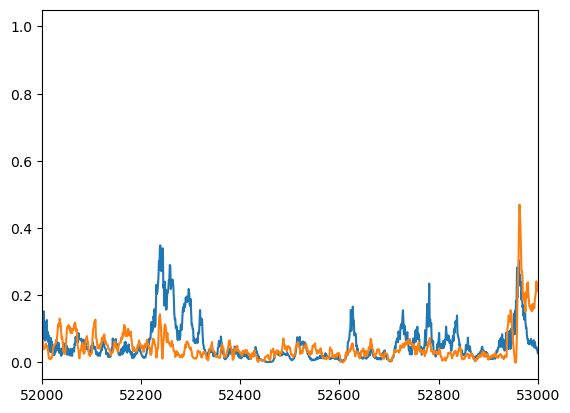

In [88]:
plt.plot(pred2R)
plt.plot(Y_2R[::10])
plt.xlim(52000,53000)

In [49]:
print(np.corrcoef(Y_2L[::10],pred2L.ravel())[0][1])

0.6161715092890995


In [50]:
print(np.corrcoef(Y_2L[220_000:230_000:10],pred2L[22000:23000])[0][1])

0.7846163644553296


In [58]:
import matplotlib as mpl

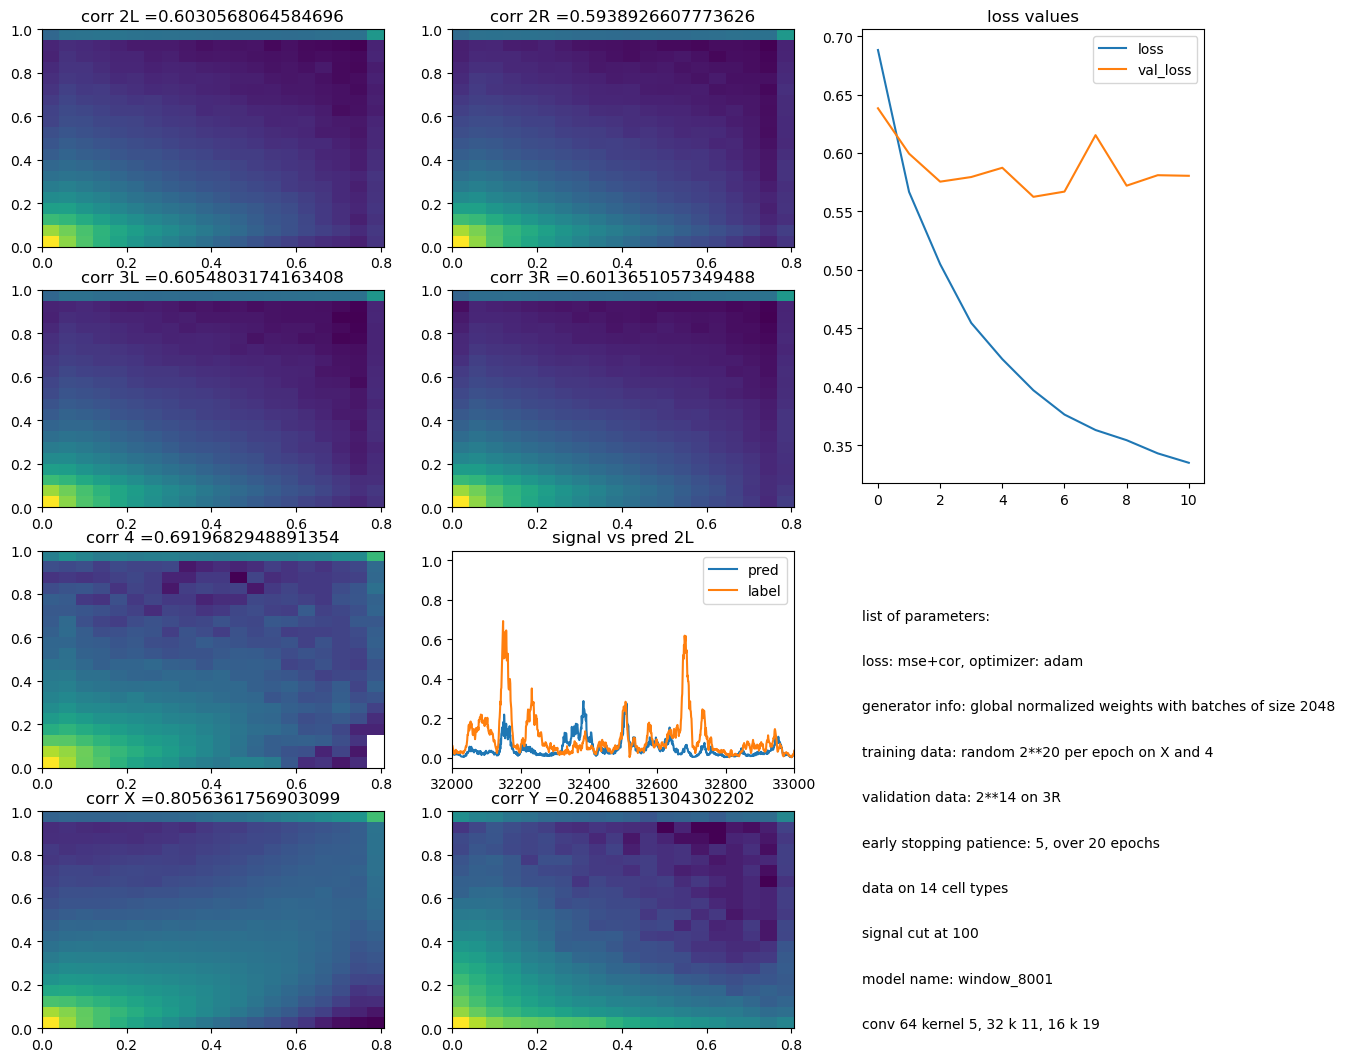

In [85]:
plt.figure(figsize=(15,10))

plt.subplot(4,3,1)
plt.hist2d(pred2L,Y_2L[::10],bins=20,norm=mpl.colors.LogNorm())
plt.title('corr 2L ='+str(corr2L))

plt.subplot(4,3,2)
plt.hist2d(pred2R,Y_2R[::10],bins=20,norm=mpl.colors.LogNorm())
plt.title('corr 2R ='+str(corr2R))

plt.subplot(4,3,4)
plt.hist2d(pred3L,Y_3L[::10],bins=20,norm=mpl.colors.LogNorm())
plt.title('corr 3L ='+str(corr3L))

plt.subplot(4,3,5)
plt.hist2d(pred3R,Y_3R[1::10],bins=20,norm=mpl.colors.LogNorm())
plt.title('corr 3R ='+str(corr3R))

plt.subplot(4,3,7)
plt.hist2d(pred4,Y_4[1::10],bins=20,norm=mpl.colors.LogNorm())
plt.title('corr 4 ='+str(corr4))

plt.subplot(4,3,10)
plt.hist2d(predX,Y_X[1::10],bins=20,norm=mpl.colors.LogNorm())
plt.title('corr X ='+str(corrX))

plt.subplot(4,3,11)
plt.hist2d(predY,Y_Y[::10],bins=20,norm=mpl.colors.LogNorm())
plt.title('corr Y ='+str(corrY))

plt.subplot(2,3,3)
plt.plot(df['loss'],label='loss')
plt.plot(df['val_loss'],label="val_loss")
plt.legend()
plt.title('loss values')

plt.subplot(4,3,8)
plt.plot(pred2L,label='pred')
plt.plot(Y_2L[::10],label='label')
plt.xlim(32000,33000)
plt.legend()
plt.title('signal vs pred 2L')

plt.subplot(2,3,6)
plt.axis([0, 10, 0, 10])
plt.text(0,9,"list of parameters:")
plt.text(0,8,"loss: mse+cor, optimizer: adam")
plt.text(0,7,"generator info: global normalized weights with batches of size 2048")
plt.text(0,6,"training data: random 2**20 per epoch on X and 4")
plt.text(0,5,"validation data: 2**14 on 3R")
plt.text(0,4,"early stopping patience: 5, over 20 epochs")
plt.text(0,3,"data on 14 cell types")
plt.text(0,2,"signal cut at 100")
plt.text(0,1,"model name: window_8001")
plt.text(0,0,"conv 64 kernel 5, 32 k 11, 16 k 19")

plt.axis("off")

plt.subplots_adjust(bottom=0.001, top=0.9999)


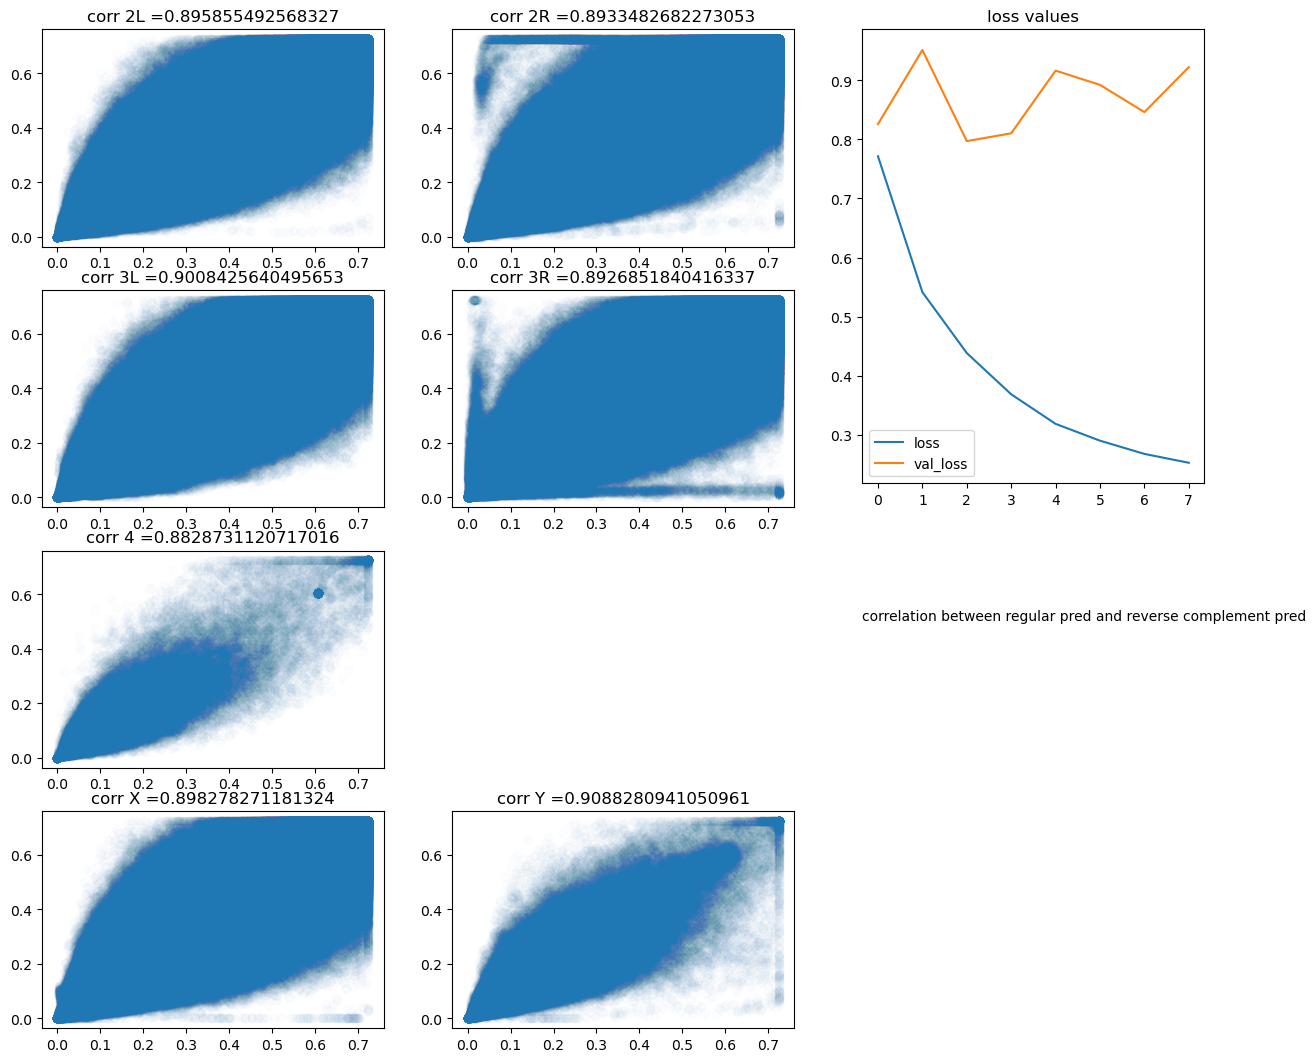

In [120]:
plt.figure(figsize=(15,10))
plt.subplot(4,3,1)
plt.scatter(pred2L,rpred2L[::-1],alpha=0.01)
plt.title('corr 2L ='+str(Ccorr2L))

plt.subplot(4,3,2)
plt.scatter(pred2R,rpred2R[::-1],alpha=0.01)
plt.title('corr 2R ='+str(Ccorr2R))

plt.subplot(4,3,4)
plt.scatter(pred3L,rpred3L[::-1],alpha=0.01)
plt.title('corr 3L ='+str(Ccorr3L))

plt.subplot(4,3,5)
plt.scatter(pred3R,rpred3R[::-1],alpha=0.01)
plt.title('corr 3R ='+str(Ccorr3R))

plt.subplot(4,3,7)
plt.scatter(pred4,rpred4[::-1],alpha=0.01)
plt.title('corr 4 ='+str(Ccorr4))

plt.subplot(4,3,10)
plt.scatter(predX,rpredX[::-1],alpha=0.01)
plt.title('corr X ='+str(CcorrX))

plt.subplot(4,3,11)
plt.scatter(predY,rpredY[::-1],alpha=0.01)
plt.title('corr Y ='+str(CcorrY))

plt.subplot(2,3,3)
plt.plot(df['loss'],label='loss')
plt.plot(df['val_loss'],label="val_loss")
plt.legend()
plt.title('loss values')

plt.subplot(2,3,6)
plt.axis([0, 10, 0, 10])
plt.text(0,9,"correlation between regular pred and reverse complement pred")
# plt.text(0,8,"loss: mse+cor, optimizer: adam")
# plt.text(0,7,"generator info: global normalized weights with batches of size 4096")
# plt.text(0,6,"training data: random 2**20 per epoch on 2R and 3L")
# plt.text(0,5,"validation data: 2**14 on 3R")
# plt.text(0,4,"early stopping patience: 5, over 20 epochs")
# plt.text(0,3,"data on 14 cell types")
# plt.text(0,2,"signal cut at 100")
# plt.text(0,1,"model name: reverse_complement")
# plt.text(0,0,"conv 64 kernel 5, 32 k 11, 16 k 19")

plt.axis("off")

plt.subplots_adjust(bottom=0.001, top=0.9999)

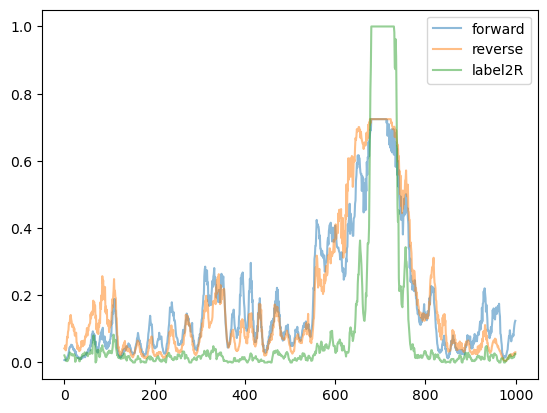

In [30]:
plt.plot(pred2R[572_000:573_000],alpha=0.5,label="forward")
plt.plot(rpred2R[len(rpred2R)-572_000:len(rpred2R)-573_000:-1],alpha=0.5,label="reverse")
plt.plot(Y_2R[5_720_000:5_730_000:10],alpha=0.5,label='label2R')
plt.legend()

In [280]:
corrs=[]
for i in range (1,len(pred2R)-30000,30000):

    corrs.append(np.corrcoef(pred2R[i:i+30_000],rpred2R[len(rpred2R)-i:len(rpred2R)-i-30_000:-1])[0,1])


In [319]:
corrs=[]
for i in range (0,len(pred2L)-3000,3000):
    corrs.append(np.corrcoef(pred2L[i:i+3000],Y_2L[i:i+30_000:10])[0,1])

In [309]:
np.corrcoef(pred2L,Y_2L[::10])[0,1]

0.5892305053274179

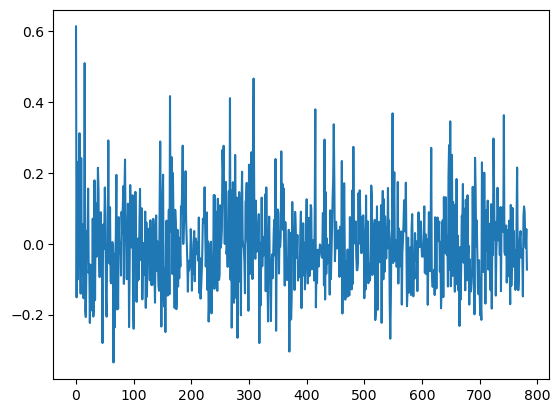

In [320]:
plt.plot(corrs)

In [283]:
min(Y_2R)

0.0

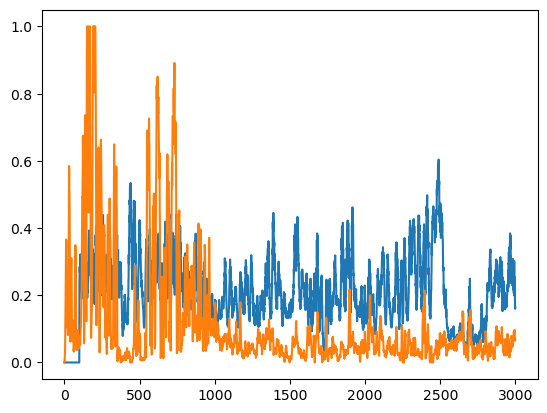

In [316]:
plt.plot(rpred2R[0:3000],label='pred')
plt.plot(Y_2R[0:30000:10],label='label')

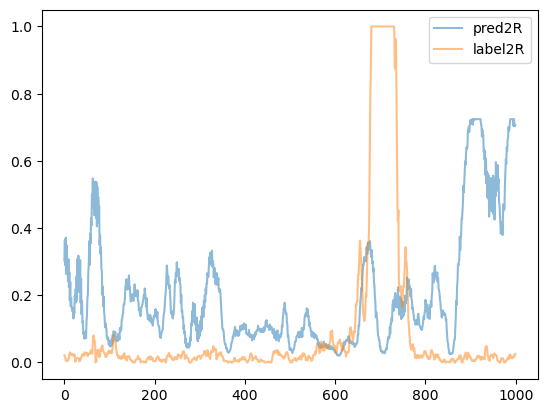

In [140]:
plt.plot(pred2R[572_000:573_000],alpha=0.5,label="pred2R")
plt.plot(Y_2R[5_720_000:5_730_000:10],alpha=0.5,label='label2R')
plt.legend()

(0.001, 15)

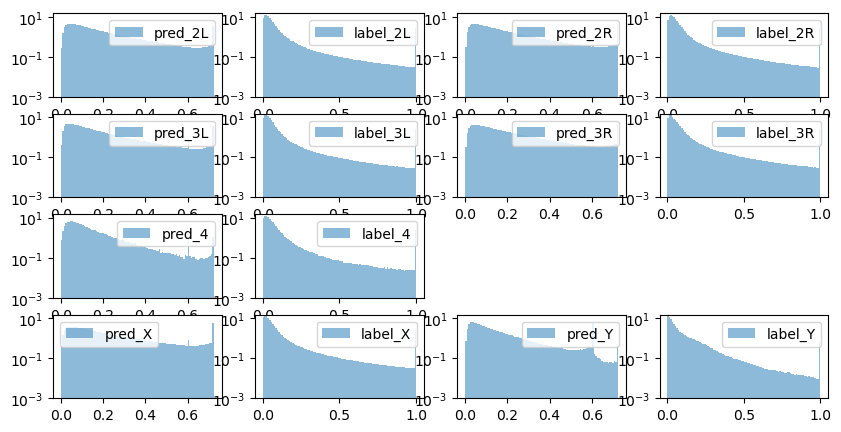

In [334]:
plt.figure(figsize=(10,5))
plt.subplot(4,4,1)
plt.yscale("log")
plt.hist(pred2L,bins=100,alpha=0.5,label="pred_2L",density=True)
plt.legend()
plt.ylim(0.001,15)

plt.subplot(4,4,2)
plt.yscale("log")
plt.hist(Y_2L,bins=100,alpha=0.5,label="label_2L",density=True)
plt.legend()
plt.ylim(0.001,15)

plt.subplot(4,4,3)
plt.yscale("log")
plt.hist(pred2R,bins=100,alpha=0.5,label="pred_2R",density=True)
plt.legend()
plt.ylim(0.001,15)

plt.subplot(4,4,4)
plt.yscale("log")
plt.hist(Y_2R,bins=100,alpha=0.5,label="label_2R",density=True)
plt.legend()
plt.ylim(0.001,15)

plt.subplot(4,4,5)
plt.yscale("log")
plt.hist(pred3L,bins=100,alpha=0.5,label="pred_3L",density=True)
plt.legend()
plt.ylim(0.001,15)

plt.subplot(4,4,6)
plt.yscale("log")
plt.hist(Y_3L,bins=100,alpha=0.5,label="label_3L",density=True)
plt.legend()
plt.ylim(0.001,15)

plt.subplot(4,4,7)
plt.yscale("log")
plt.hist(pred3R,bins=100,alpha=0.5,label="pred_3R",density=True)
plt.legend()
plt.ylim(0.001,15)

plt.subplot(4,4,8)
plt.yscale("log")
plt.hist(Y_3R,bins=100,alpha=0.5,label="label_3R",density=True)
plt.legend()
plt.ylim(0.001,15)

plt.subplot(4,4,9)
plt.yscale("log")
plt.hist(pred4,bins=100,alpha=0.5,label="pred_4",density=True)
plt.legend()
plt.ylim(0.001,15)

plt.subplot(4,4,10)
plt.yscale("log")
plt.hist(Y_4,bins=100,alpha=0.5,label="label_4",density=True)
plt.legend()
plt.yscale("log")
plt.ylim(0.001,15)

plt.subplot(4,4,13)
plt.yscale("log")
plt.hist(predX,bins=100,alpha=0.5,label="pred_X",density=True)
plt.legend()
plt.ylim(0.001,15)

plt.subplot(4,4,14)
plt.yscale("log")
plt.hist(Y_X,bins=100,alpha=0.5,label="label_X",density=True)
plt.legend()
plt.ylim(0.001,15)

plt.subplot(4,4,15)
plt.yscale("log")
plt.hist(predY,bins=100,alpha=0.5,label="pred_Y",density=True)
plt.legend()
plt.ylim(0.001,15)

plt.subplot(4,4,16)
plt.yscale("log")
plt.hist(Y_Y,bins=100,alpha=0.5,label="label_Y",density=True)
plt.legend()
plt.ylim(0.001,15)

In [28]:
# create scATAC values for each chr
Y_2L=np.load('/home/florian/projet/scATACseq_14chr.npz')['2L'][0]
Y_2R=np.load('/home/florian/projet/scATACseq_14chr.npz')['2R'][0]
Y_3L=np.load('/home/florian/projet/scATACseq_14chr.npz')['3L'][0]
Y_3R=np.load('/home/florian/projet/scATACseq_14chr.npz')['3R'][0]
Y_4=np.load('/home/florian/projet/scATACseq_14chr.npz')['4'][0]
Y_X=np.load('/home/florian/projet/scATACseq_14chr.npz')['X'][0]
Y_Y=np.load('/home/florian/projet/scATACseq_14chr.npz')['Y'][0]

In [29]:
print("mean 2L:"+ str(np.mean(Y_2L)))
print('mean 2R:'+ str(np.mean(Y_2R)))
print('mean 3L:'+ str(np.mean(Y_3L)))
print('mean 3R:'+ str(np.mean(Y_3R)))
print('mean 4:'+ str(np.mean(Y_4)))
print('mean X:'+ str(np.mean(Y_X)))
print('mean Y:'+ str(np.mean(Y_Y)))

mean 2L:14.14499582099383
mean 2R:13.940687664602725
mean 3L:12.997984920342923
mean 3R:13.722145277023445
mean 4:12.983080344600793
mean X:12.923938479124221
mean Y:2.376844061625505


/home/dell3/anaconda3/envs/workenv/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/dell3/anaconda3/envs/workenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


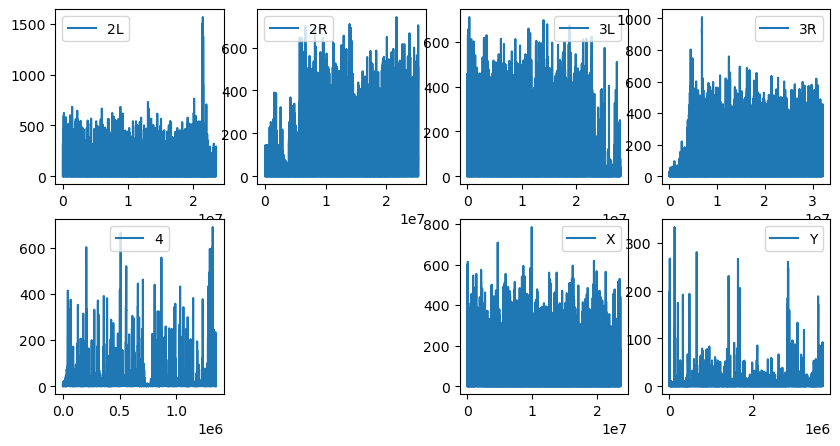

In [36]:
plt.figure(figsize=(10,5))

plt.subplot(2,4,1)
plt.plot(Y_2L,label='2L')
plt.legend()

plt.subplot(2,4,2)
plt.plot(Y_2R,label='2R')
plt.legend()

plt.subplot(2,4,3)
plt.plot(Y_3L,label='3L')
plt.legend()

plt.subplot(2,4,4)
plt.plot(Y_3R,label='3R')
plt.legend()

plt.subplot(2,4,5)
plt.plot(Y_4,label='4')
plt.legend()

plt.subplot(2,4,7)
plt.plot(Y_X,label='X')
plt.legend()

plt.subplot(2,4,8)
plt.plot(Y_Y,label='Y')
plt.legend()